In [1]:
# Impoting required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# setting default option
pd.set_option("mode.copy_on_write", True)

In [2]:
# importing datasets
df = pd.read_parquet("../../01_Data/02_Processed/02_Mortality_Combined.parquet")
df.sample(5)

,State,County,County_Code,Year,Cause,Deaths
7545,WI,WASHINGTON,55131,2012,Drug poisonings (overdose) Unintentional (X40-...,15
10384,WA,THURSTON,53067,2015,Drug poisonings (overdose) Unintentional (X40-...,26
3087,NY,QUEENS,36081,2007,All other drug-induced causes,23
233,MD,BALTIMORE,24005,2003,Drug poisonings (overdose) Suicide (X60-X64),10
2641,AZ,PINAL,04021,2007,Drug poisonings (overdose) Unintentional (X40-...,34


In [3]:
population = pd.read_parquet("../../01_Data/02_Processed/01_Population.parquet")
population.sample(5)

,State,State_Code,County,County_Code,Year,Population
19520,Missouri,29,JACKSON,29095,2010,674854
13571,Kentucky,21,MARTIN,21159,2015,12299
17158,Minnesota,27,KITTSON,27069,2014,4455
29310,Pennsylvania,42,LUZERNE,42079,2011,321073
16412,Michigan,26,MUSKEGON,26121,2009,172755


In [4]:
# Dropping Alaska
df = df[df["State"] != "AK"]

In [5]:
df["Cause"].value_counts()

Cause
Drug poisonings (overdose) Unintentional (X40-X44)    7538
Drug poisonings (overdose) Suicide (X60-X64)          1461
Drug poisonings (overdose) Undetermined (Y10-Y14)      757
All other drug-induced causes                          625
Drug poisonings (overdose) Homicide (X85)                2
Name: count, dtype: int64

In [6]:
# Dropping poisonong since we have only 2 values
df = df[df["Cause"] != "Drug poisonings (overdose) Homicide (X85)"]

In [7]:
df.isna().sum()

State          0
County         0
County_Code    0
Year           0
Cause          0
Deaths         8
dtype: int64

In [8]:
df[df["Deaths"].isna()]

,State,County,County_Code,Year,Cause,Deaths
10345,VA,BEDFORD CITY,51515,2015,Drug poisonings (overdose) Unintentional (X40-...,<NA>
10346,VA,BEDFORD CITY,51515,2015,Drug poisonings (overdose) Suicide (X60-X64),<NA>
10348,VA,BEDFORD CITY,51515,2015,Drug poisonings (overdose) Undetermined (Y10-Y14),<NA>
10349,VA,BEDFORD CITY,51515,2015,All other drug-induced causes,<NA>
10351,VA,CLIFTON FORGE CITY,51560,2015,Drug poisonings (overdose) Unintentional (X40-...,<NA>
10352,VA,CLIFTON FORGE CITY,51560,2015,Drug poisonings (overdose) Suicide (X60-X64),<NA>
10354,VA,CLIFTON FORGE CITY,51560,2015,Drug poisonings (overdose) Undetermined (Y10-Y14),<NA>
10355,VA,CLIFTON FORGE CITY,51560,2015,All other drug-induced causes,<NA>


In [9]:
# drop these NAs for now since they are all in VA and in 2015
df = df.dropna()

In [10]:
df["Deaths"].describe()

count      10373.0
mean      37.01475
std      53.134654
min           10.0
25%           13.0
50%           19.0
75%           36.0
max          705.0
Name: Deaths, dtype: Float64

In [11]:
population["Population"].describe()

count    4.049500e+04
mean     9.803144e+04
std      3.135551e+05
min      0.000000e+00
25%      1.126200e+04
50%      2.577600e+04
75%      6.644000e+04
max      1.007726e+07
Name: Population, dtype: float64

In [12]:
combined = pd.merge(
    df,
    population,
    on=["County_Code", "Year"],
    how="left",
    validate="m:1",
    indicator=True,
)
combined.sample(5)

,State_x,County_x,County_Code,Year,Cause,Deaths,State_y,State_Code,County_y,Population,_merge
6866,GA,JACKSON,13157,2012,Drug poisonings (overdose) Unintentional (X40-...,11,Georgia,13,JACKSON,60860,both
5780,AZ,MARICOPA,04013,2011,All other drug-induced causes,28,Arizona,04,MARICOPA,3875371,both
5131,GA,HARALSON,13143,2010,Drug poisonings (overdose) Unintentional (X40-...,14,Georgia,13,HARALSON,28763,both
4898,WA,WHATCOM,53073,2009,Drug poisonings (overdose) Unintentional (X40-...,18,Washington,53,WHATCOM,199865,both
3344,WV,MCDOWELL,54047,2007,Drug poisonings (overdose) Unintentional (X40-...,15,West Virginia,54,MCDOWELL,22746,both


In [13]:
# check if any of them don't have a match
combined[combined["_merge"] == "left_only"]

,State_x,County_x,County_Code,Year,Cause,Deaths,State_y,State_Code,County_y,Population,_merge


In [14]:
# check counties with no population data
combined["Population"].describe()

count    1.037300e+04
mean     5.888579e+05
std      9.580291e+05
min      1.028200e+04
25%      1.315990e+05
50%      2.834050e+05
75%      6.970800e+05
max      1.007726e+07
Name: Population, dtype: float64

In [15]:
combined["Deaths"].describe()

count      10373.0
mean      37.01475
std      53.134654
min           10.0
25%           13.0
50%           19.0
75%           36.0
max          705.0
Name: Deaths, dtype: Float64

In [16]:
combined.sample(5)

,State_x,County_x,County_Code,Year,Cause,Deaths,State_y,State_Code,County_y,Population,_merge
6257,NM,SANDOVAL,35043,2011,Drug poisonings (overdose) Unintentional (X40-...,25,New Mexico,35,SANDOVAL,134347,both
3600,IN,HENRY,18065,2008,Drug poisonings (overdose) Unintentional (X40-...,14,Indiana,18,HENRY,49420,both
1342,FL,LEON,12073,2005,Drug poisonings (overdose) Unintentional (X40-...,16,Florida,12,LEON,258083,both
6614,WA,SNOHOMISH,53061,2011,Drug poisonings (overdose) Unintentional (X40-...,143,Washington,53,SNOHOMISH,722149,both
6898,IL,PEORIA,17143,2012,Drug poisonings (overdose) Unintentional (X40-...,23,Illinois,17,PEORIA,187354,both


In [17]:
# clean combined as required
df2 = combined[
    [
        "State_y",
        "State_x",
        "County_x",
        "County_Code",
        "Year",
        "Cause",
        "Deaths",
        "Population",
    ]
]

In [18]:
df2 = df2.rename(
    columns={"State_y": "State", "State_x": "State_Code", "County_x": "County"}
)

In [19]:
df2.sample(5)

,State,State_Code,County,County_Code,Year,Cause,Deaths,Population
3569,Hawaii,HI,HONOLULU,15003,2008,Drug poisonings (overdose) Unintentional (X40-...,71,933680
5009,California,CA,SAN MATEO,06081,2010,Drug poisonings (overdose) Suicide (X60-X64),15,719948
7513,Wisconsin,WI,KENOSHA,55059,2012,Drug poisonings (overdose) Unintentional (X40-...,37,167273
5630,Tennessee,TN,SHELBY,47157,2010,Drug poisonings (overdose) Suicide (X60-X64),12,928475
2427,Pennsylvania,PA,BUCKS,42017,2006,Drug poisonings (overdose) Unintentional (X40-...,90,619544


In [20]:
# Claculating Mortality Rate
df3 = df2.copy()
df3["Mortality_Rate"] = df3["Deaths"] / df3["Population"]

In [21]:
df3.sample(5)

,State,State_Code,County,County_Code,Year,Cause,Deaths,Population,Mortality_Rate
7111,Nevada,NV,WASHOE,32031,2012,Drug poisonings (overdose) Unintentional (X40-...,83,427490,0.000194
6056,Kansas,KS,SHAWNEE,20177,2011,Drug poisonings (overdose) Unintentional (X40-...,18,178968,0.000101
577,Alabama,AL,JEFFERSON,01073,2004,All other drug-induced causes,21,656023,0.000032
4542,Mississippi,MS,HANCOCK,28045,2009,Drug poisonings (overdose) Unintentional (X40-...,12,43471,0.000276
4975,California,CA,LOS ANGELES,06037,2010,Drug poisonings (overdose) Unintentional (X40-...,552,9821647,0.000056


In [22]:
# Calculating Mortality Rate for each casue at state level
df4 = (
    df3.groupby(["State", "State_Code", "Year", "Cause"])
    .agg({"Deaths": "sum", "Population": "sum"})
    .reset_index()
)

In [23]:
df4.sample(5)

,State,State_Code,Year,Cause,Deaths,Population
525,Iowa,IA,2010,Drug poisonings (overdose) Unintentional (X40-...,66,809364
76,Arizona,AZ,2014,All other drug-induced causes,38,4094842
199,Connecticut,CT,2005,All other drug-induced causes,45,2622896
624,Maine,ME,2003,Drug poisonings (overdose) Unintentional (X40-...,57,617651
12,Alabama,AL,2008,Drug poisonings (overdose) Unintentional (X40-...,361,2756243


In [24]:
# check if all states have a rate for each year
df4[["State", "Year"]]["State"].value_counts()  # .sort_values().value_counts()

State
California              52
Michigan                52
Arizona                 52
Texas                   51
New York                49
Pennsylvania            49
Oregon                  49
Indiana                 49
Florida                 47
Utah                    46
Maryland                45
Ohio                    45
Massachusetts           43
Washington              42
Illinois                42
Minnesota               38
Wisconsin               36
Tennessee               36
Hawaii                  35
Oklahoma                35
Kentucky                34
District of Columbia    34
Colorado                33
Alabama                 32
Georgia                 32
Connecticut             32
Missouri                31
Nevada                  31
Louisiana               31
New Jersey              31
New Mexico              28
Virginia                25
Kansas                  25
North Carolina          25
Idaho                   25
South Carolina          24
Delaware              

In [25]:
df3[["State", "Cause"]].drop_duplicates()["State"].value_counts().value_counts()

count
4    29
3    10
2     6
1     5
Name: count, dtype: int64

In [26]:
# checking count of categories in Cause
df3["Cause"].value_counts()

Cause
Drug poisonings (overdose) Unintentional (X40-X44)    7536
Drug poisonings (overdose) Suicide (X60-X64)          1459
Drug poisonings (overdose) Undetermined (Y10-Y14)      755
All other drug-induced causes                          623
Name: count, dtype: int64

In [27]:
# keeping only unintentional overdose since others have very few values compared to this
df4 = df4[df4["Cause"] == "Drug poisonings (overdose) Unintentional (X40-X44)"]

In [28]:
# rechecking for data completeness
df4[["State", "Year"]]["State"].value_counts().value_counts()

count
13    41
12     3
7      2
11     1
10     1
4      1
1      1
Name: count, dtype: int64

In [29]:
# Calculating Mortality Rate at state level
df4["State_Mortality_Rate"] = df4["Deaths"] / df4["Population"]

In [30]:
# combinations of state and county from population data
st_county = population[["State", "County", "County_Code", "Year"]].drop_duplicates()
st_county.sample(5)

,State,County,County_Code,Year
20815,Montana,MUSSELSHELL,30065,2005
35631,Texas,WILSON,48493,2014
34875,Texas,PRESIDIO,48377,2012
15132,Maryland,ALLEGANY,24001,2003
3338,Colorado,MOFFAT,08081,2013


In [31]:
# create cross join on state level and county
master = pd.merge(st_county, df4, on=["State", "Year"], how="left", indicator=True)

In [32]:
master.sample(5)

,State,County,County_Code,Year,State_Code,Cause,Deaths,Population,State_Mortality_Rate,_merge
23410,New York,ALLEGANY,36003,2013,NY,Drug poisonings (overdose) Unintentional (X40-...,1720,16888461.0,0.000102,both
39804,Wisconsin,MONROE,55081,2014,WI,Drug poisonings (overdose) Unintentional (X40-...,549,3491085.0,0.000157,both
594,Alabama,MARENGO,01091,2012,AL,Drug poisonings (overdose) Unintentional (X40-...,352,2858447.0,0.000123,both
27450,Oklahoma,CARTER,40019,2010,OK,Drug poisonings (overdose) Unintentional (X40-...,396,2258103.0,0.000175,both
34554,Texas,MIDLAND,48329,2003,TX,Drug poisonings (overdose) Unintentional (X40-...,1008,14887036.0,0.000068,both


In [33]:
master["_merge"].value_counts()

_merge
both          38673
left_only      1822
right_only        0
Name: count, dtype: int64

In [34]:
master[master["_merge"] == "left_only"]

,State,County,County_Code,Year,State_Code,Cause,Deaths,Population,State_Mortality_Rate,_merge
1066,Arkansas,ARKANSAS,05001,2003,NaN,NaN,<NA>,NaN,<NA>,left_only
1079,Arkansas,ASHLEY,05003,2003,NaN,NaN,<NA>,NaN,<NA>,left_only
1092,Arkansas,BAXTER,05005,2003,NaN,NaN,<NA>,NaN,<NA>,left_only
1105,Arkansas,BENTON,05007,2003,NaN,NaN,<NA>,NaN,<NA>,left_only
1118,Arkansas,BOONE,05009,2003,NaN,NaN,<NA>,NaN,<NA>,left_only
...,...,...,...,...,...,...,...,...,...,...
40483,Wyoming,WESTON,56045,2004,NaN,NaN,<NA>,NaN,<NA>,left_only
40484,Wyoming,WESTON,56045,2005,NaN,NaN,<NA>,NaN,<NA>,left_only
40485,Wyoming,WESTON,56045,2006,NaN,NaN,<NA>,NaN,<NA>,left_only
40487,Wyoming,WESTON,56045,2008,NaN,NaN,<NA>,NaN,<NA>,left_only


In [35]:
master[master["_merge"] == "left_only"][["State", "Year"]].drop_duplicates()

,State,Year
1066,Arkansas,2003
15136,Maryland,2007
20398,Montana,2004
20400,Montana,2006
20405,Montana,2011
21125,Nebraska,2003
25493,North Dakota,2003
25494,North Dakota,2004
25495,North Dakota,2005
25496,North Dakota,2006


In [36]:
# dropping these rows since we have no state level data for them
master = master[master["_merge"] == "both"]

In [37]:
master_2 = master[
    [
        "State",
        "State_Code",
        "County",
        "County_Code",
        "Year",
        "Cause",
        "State_Mortality_Rate",
    ]
]

In [38]:
master_2.sample(5)

,State,State_Code,County,County_Code,Year,Cause,State_Mortality_Rate
20317,Missouri,MO,WARREN,29219,2014,Drug poisonings (overdose) Unintentional (X40-...,0.000177
21755,Nebraska,NE,JOHNSON,31097,2009,Drug poisonings (overdose) Unintentional (X40-...,0.000058
10835,Iowa,IA,PALO ALTO,19147,2009,Drug poisonings (overdose) Unintentional (X40-...,0.000073
23467,New York,NY,CHAUTAUQUA,36013,2005,Drug poisonings (overdose) Unintentional (X40-...,0.000066
15351,Maryland,MD,QUEEN ANNES,24035,2014,Drug poisonings (overdose) Unintentional (X40-...,0.000042


In [39]:
master_2["State_Mortality_Rate"].describe()

count     38673.0
mean     0.000114
std      0.000054
min      0.000012
25%       0.00008
50%      0.000101
75%      0.000134
max      0.000465
Name: State_Mortality_Rate, dtype: Float64

In [40]:
# merge with the original data
df5 = pd.merge(
    master_2,
    df3,
    on=["State", "State_Code", "County", "County_Code", "Year", "Cause"],
    how="left",
    indicator=True,
    validate="1:1",
)

In [41]:
df5.sample(5)

,State,State_Code,County,County_Code,Year,Cause,State_Mortality_Rate,Deaths,Population,Mortality_Rate,_merge
34663,Virginia,VA,AMHERST,51009,2015,Drug poisonings (overdose) Unintentional (X40-...,0.000107,<NA>,NaN,<NA>,left_only
15147,Maryland,MD,CHARLES,24017,2010,Drug poisonings (overdose) Unintentional (X40-...,0.000019,<NA>,NaN,<NA>,left_only
13513,Kentucky,KY,MEADE,21163,2006,Drug poisonings (overdose) Unintentional (X40-...,0.000165,<NA>,NaN,<NA>,left_only
23607,New York,NY,SAINT LAWRENCE,36089,2011,Drug poisonings (overdose) Unintentional (X40-...,0.000085,<NA>,NaN,<NA>,left_only
36186,Virginia,VA,PETERSBURG CITY,51730,2004,Drug poisonings (overdose) Unintentional (X40-...,0.000067,<NA>,NaN,<NA>,left_only


In [42]:
# Remap with population data to get county population
df6 = pd.merge(
    df5,
    population[["County_Code", "Year", "Population"]],
    on=["County_Code", "Year"],
    how="left",
    validate="m:1",
    indicator="merge2",
)

In [43]:
df6.sample(5)

,State,State_Code,County,County_Code,Year,Cause,State_Mortality_Rate,Deaths,Population_x,Mortality_Rate,_merge,Population_y,merge2
28909,South Carolina,SC,COLLETON,45029,2005,Drug poisonings (overdose) Unintentional (X40-...,0.000106,<NA>,NaN,<NA>,left_only,38728,both
33465,Texas,TX,SAN JACINTO,48407,2007,Drug poisonings (overdose) Unintentional (X40-...,0.000081,<NA>,NaN,<NA>,left_only,25719,both
37561,West Virginia,WV,WOOD,54107,2014,Drug poisonings (overdose) Unintentional (X40-...,0.000396,18,86533.0,0.000208,both,86533,both
8372,Illinois,IL,SANGAMON,17167,2013,Drug poisonings (overdose) Unintentional (X40-...,0.000106,17,199190.0,0.000085,both,199190,both
19736,Missouri,MO,NEW MADRID,29143,2013,Drug poisonings (overdose) Unintentional (X40-...,0.000164,<NA>,NaN,<NA>,left_only,18315,both


In [44]:
df6["merge2"].value_counts()

merge2
both          38673
left_only         0
right_only        0
Name: count, dtype: int64

In [45]:
# check if we have population for all counties
df6["Population_y"].describe()

count    3.867300e+04
mean     1.016857e+05
std      3.201735e+05
min      0.000000e+00
25%      1.229900e+04
50%      2.715300e+04
75%      6.946000e+04
max      1.007726e+07
Name: Population_y, dtype: float64

Text(0.5, 1.0, 'Missing Values vs County Population Threshold')

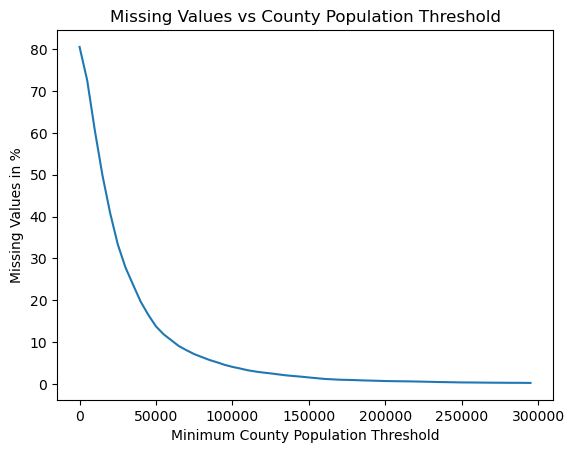

In [46]:
# graph to check missing vs population
threshold = []
missing = []
for i in range(0, 300000, 5000):
    threshold.append(i)
    missing.append(
        (df6[df6["Population_y"] >= i]["Mortality_Rate"].isna().sum()) / len(df6) * 100
    )

# plotting this
plt.plot(threshold, missing)
plt.xlabel("Minimum County Population Threshold")
plt.ylabel("Missing Values in %")
plt.title("Missing Values vs County Population Threshold")

### Setting population Theshold as 50,000 as around this level we will have 10% missing values which is accepatable

In [47]:
def new_death(row):
    if pd.isna(row["Deaths"]):
        return min(int(row["Population_y"] * row["State_Mortality_Rate"]), 9)
    else:
        return row["Deaths"]

In [48]:
population_threshold = 50000
# dropping counties with population less than the threshold
df7 = df6[df6["Population_y"] >= population_threshold]

In [49]:
df7["Deaths_2"] = df7.apply(new_death, axis=1)

In [50]:
df7.sample(5)

,State,State_Code,County,County_Code,Year,Cause,State_Mortality_Rate,Deaths,Population_x,Mortality_Rate,_merge,Population_y,merge2,Deaths_2
38446,Wisconsin,WI,WASHINGTON,55131,2015,Drug poisonings (overdose) Unintentional (X40-...,0.000154,13,133920.0,0.000097,both,133920,both,13
10206,Iowa,IA,DUBUQUE,19061,2014,Drug poisonings (overdose) Unintentional (X40-...,0.00009,<NA>,NaN,<NA>,left_only,96544,both,8
4949,Georgia,GA,CLARKE,13059,2009,Drug poisonings (overdose) Unintentional (X40-...,0.000087,<NA>,NaN,<NA>,left_only,116843,both,9
12644,Kentucky,KY,BULLITT,21029,2008,Drug poisonings (overdose) Unintentional (X40-...,0.000193,<NA>,NaN,<NA>,left_only,72738,both,9
2730,Colorado,CO,ADAMS,08001,2013,Drug poisonings (overdose) Unintentional (X40-...,0.00012,64,469995.0,0.000136,both,469995,both,64


In [51]:
df8 = df7[
    [
        "State",
        "State_Code",
        "County",
        "County_Code",
        "Year",
        "Cause",
        "Deaths_2",
        "Population_y",
    ]
]

df8 = df8.rename(columns={"Population_y": "Population", "Deaths_2": "Deaths"})

In [52]:
df9 = (
    df8.groupby(["State", "State_Code", "County", "County_Code", "Year"])
    .agg({"Deaths": "sum", "Population": "mean"})
    .reset_index()
)

In [53]:
df9.sample(5)

,State,State_Code,County,County_Code,Year,Deaths,Population
9467,Rhode Island,RI,WASHINGTON,44009,2009,12,127605.0
3909,Kentucky,KY,PULASKI,21199,2004,7,59175.0
10619,Texas,TX,LUBBOCK,48303,2003,14,253388.0
2433,Georgia,GA,JACKSON,13157,2013,12,61286.0
6870,New York,NY,ONTARIO,36069,2009,7,107214.0


In [54]:
df9["Mortality_Rate"] = df9["Deaths"] / df9["Population"]

In [55]:
# write to parquet
# df9.to_parquet("../../Data/processed/mortality_corrected.parquet", index=False)